<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [40]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [41]:
import requests

df = pd.read_csv('data/job_listings.csv')
df['text'] = df['description'].apply(lambda x: BeautifulSoup(x).get_text())

In [42]:
df['text'] = [re.sub(r'[^a-zA-Z ^0-9]', '', row) for row in df['text']]

In [43]:
df['text'][1]

'bJob DescriptionnnAs a Data Scientist 1 you will help us build machine learning models data pipelines and microservices to help our clients navigate their healthcare journey You will do so by empowering and improving the next generation of Accolade Applications and user experiencesnA day in the lifexe2x80xa6nWork with a small agile team to design and develop mobile applications in an iterative fashionnWork with a tightknit group of development team members in SeattlenContribute to best practices and help guide the future of our applicationsnOperates effectively as a collaborative member of the development teamnOperates effectively as an individual for quick turnaround of enhancements and fixesnResponsible for meeting expectations and deliverables on time with high qualitynDrive and implement new features within our mobile applicationsnPerform thorough manual testing and writing test cases that cover all areasnIdentify new development toolsapproaches that will increase code quality eff

## 2) Use Spacy to tokenize the listings 

In [44]:
##### Your Code Here #####
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = spacy.load('en_core_web_lg')

In [45]:
nlp = English()

tokenizer = Tokenizer(nlp.vocab)

In [46]:
tokens = []

for doc in tokenizer.pipe(df['text'], batch_size = 500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

df['tokens'].head()

0    [bjob, requirementsnconceptual, understanding,...
1    [bjob, descriptionnnas, data, scientist, 1, he...
2    [bas, data, scientist, working, consulting, bu...
3    [b4969,  , 6756, monthcontractunder, general, ...
4    [blocation, usa, xe2x80x93, multiple, location...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [48]:
vector = CountVectorizer()

for text in df['tokens']:
    vector.fit(text)
    
dtm = vector.transform(text)

print(vector.get_feature_names())

['25000', '35', 'accordance', 'achieve', 'action', 'additional', 'advanced', 'age', 'agile', 'aim', 'algorithm', 'algorithms', 'allowed', 'ambitious', 'analysis', 'analytic', 'analytical', 'analytics', 'ancestry', 'andor', 'annual', 'applied', 'applying', 'appropriate', 'areanwilling', 'assets', 'assistance', 'association', 'authorized', 'available', 'avronexperience', 'background', 'based', 'bcerner', 'best', 'biostatistics', 'brightest', 'business', 'care', 'careers', 'cassandra', 'category', 'cerner', 'check', 'citizenship', 'client', 'clientfacing', 'clients', 'clinical', 'cluster', 'clustering', 'collections', 'color', 'complexity', 'comply', 'compromises', 'computational', 'computer', 'computingnpreferred', 'confidence', 'contextual', 'corporate', 'corporation', 'couch', 'countries', 'countriesnncernerxe2x80x99s', 'creating', 'currently', 'data', 'databases', 'datadriven', 'db', 'decision', 'degree', 'develop', 'developing', 'development', 'directly', 'disability', 'discover', 'd

In [49]:
dtm = pd.DataFrame(dtm.todense(), columns = vector.get_feature_names())

In [50]:
dtm.tail()

,25000,35,accordance,achieve,action,additional,advanced,age,agile,aim,...,visa,visually,warehousing,willing,work,workflow,working,workplace,xe2x80x93,years
374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 4) Visualize the most common word counts

In [51]:
##### Your Code Here #####
from collections import Counter

In [52]:
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('data', 4021),
 ('business', 1093),
 ('experience', 1022),
 (' ', 928),
 ('work', 927),
 ('science', 877),
 ('team', 859),
 ('learning', 842),
 ('machine', 667),
 ('analytics', 645)]

In [53]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = list(zip(word_counts.keys(), word_counts.values()))
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = list(zip(appears_in.keys(), appears_in.values()))
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [54]:
wc = count(df['tokens'])

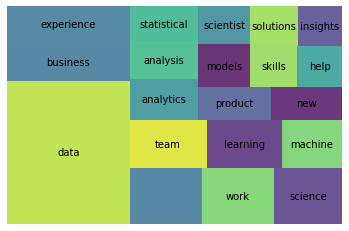

In [55]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes = wc_top20['pct_total'], label = wc_top20['word'], alpha = .8)
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [56]:
##### Your Code Here #####

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) & (token.is_punct != True)]

In [57]:
tfidf = TfidfVectorizer(stop_words = 'english',
                        ngram_range = (1, 2),
                        max_df = .97,
                        min_df = .02,
                        tokenizer = tokenize)

dtm = tfidf.fit_transform(df['text'])

dtm = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())

dtm.shape

(426, 2610)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [58]:
##### Your Code Here #####
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

dist_matrix = cosine_similarity(dtm)

In [59]:
df_dist_matrix = pd.DataFrame(dist_matrix)
df_dist_matrix.shape

(426, 426)

In [60]:
df_dist_matrix[df_dist_matrix[0] < 1][0].sort_values(ascending = False)[:5]

42     0.191394
138    0.191394
338    0.173859
403    0.170600
115    0.159438
Name: 0, dtype: float64

In [61]:
print(df['text'][300][:150])

bWe are looking for an experienced Data Scientist to launch our new analytical framework for predicting consumer behavior in the mortgage buying proce


In [62]:
dtm.head()

,,analytics,data,1,1 year,10,100,12,12 months,2,...,years relevant,years work,yearsxe2x80x99,yearsxe2x80x99 experience,york,york city,youxe2x80x99ll,youxe2x80x99ll work,youxe2x80x99re,youxe2x80x99ve
0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.142498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.054047,0.0,0.0,0.139382,0.08633,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068972,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
nn = NearestNeighbors(n_neighbors=5, algorithm = 'kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [64]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.27169675, 1.27169675, 1.28541136, 1.28794386]]),
 array([[  0, 138,  42, 338, 403]]))

In [65]:
ideal_ds_job_description = [""" Become rich """]

ideal = tfidf.transform(ideal_ds_job_description)

In [66]:
nn.kneighbors(ideal.todense())

(array([[1.25811917, 1.30091743, 1.33370714, 1.33455585, 1.33955027]]),
 array([[124, 111, 160, 169,  75]]))

In [67]:
df['text'][124]

'bKeysight Marketing is hiring a data scientist to scale up insights that are a foundational element for Marketing transformation You will be part of the data analysts team whose goal is to build analytic capabilities that support the strategy planning and execution of Marketing activitiesnnYou will need to have a deep competency and strong experience with statistics modeling using data science tools and applying them to the real world of customer targeting and optimizing ROInnResponsibilitiesnYour focus will be generating customer insights the improve online and offline customer experience and targetingnYou will also focus on automating reporting that can be easily consumed by different stakeholdersnYou will consolidate validate and investigate big data from multiple sources to find and deliver actionable insights to business partners and to upper management to make informed business decisionsnYou will create datadriven attribution statistical models of Marketing touches and customer 

In [68]:
df['text'][111]

'bMine rich user data sets and find insights that will drive the decisions that power our platformnnnThe Missionnnnviagogo is on a mission to revolutionize the way people get tickets to live events making it possible for anyone anywhere in the world to see their favorite artists teams or shows live Weve helped millions of people from almost every country attend live events and were just getting started We believe creative individuals with innovative ideas are the engine for our rapid growth so were looking for the worlds smartest data scientists to join our team where youll be given the freedom to make meaningful and measurable improvements impacting millions of peoplennnYour RolennnData scientists sit at the core of our business constantly working to identify new product features and improvements that enhance the experience for our users and drive proxefxacx81table revenue streams for the company Youll be part of a team using data to automate manual processes  human decisions the work

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 